# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

# Details Student 1:
Michael Volobuev 215016494 michaelvolobuev000@gmail.com
# Details Student 2:
Mikey Torbin 328372883 mikeyt030306@gmail.com

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------

from sklearn.feature_selection import SelectKBest, chi2 ,mutual_info_classif
from sklearn.svm import SVC 
from numpy import mean ,std
from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier ,AdaBoostClassifier , BaggingClassifier

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\Michael\Desktop\ASS3\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

In [10]:
df_train['gender'].value_counts()

m    575
f    178
Name: gender, dtype: int64

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# Function to clean text data by removing numbers, special characters, and extra spaces
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [12]:
def prepare_data(vectorizer='TfidfVectorizer', ngram_range=(1, 1), min_df=5, k=1000, test=False):
    # Check if preparing test data
    if test:
        # Load test dataset from CSV
        test_filename = 'corpus_for_test.csv'
        df = pd.read_csv(test_filename, index_col=None, encoding='utf-8')
        
        # Apply text cleaning to the 'story' column
        df['story'] = df['story'].apply(clean_text)
        
        # Initialize the vectorizer (TF-IDF or CountVectorizer)
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range)

        # Transform test text data into numerical features
        X_test = df['story']
        X_test_vect = vectorizer.transform(X_test)  # Use transform instead of fit_transform

        # Select top k features using mutual information
        selector = SelectKBest(mutual_info_classif, k=k)
        X_test_selected = selector.transform(X_test_vect)

        # Scale the selected features using Min-Max scaling
        scaler = MinMaxScaler()
        X_test_scaled = scaler.fit_transform(X_test_selected.toarray())
        
        # Return the preprocessed test data (text and scaled features)
        return df['story'], X_test_scaled

    # Preparing training data
    train_filename = 'annotated_corpus_for_train.csv'
    df = pd.read_csv(train_filename, index_col=None, encoding='utf-8')

    # Apply text cleaning to the 'story' column with Hebrew language
    df['story'] = df['story'].apply(clean_text)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42)

    # Initialize the vectorizer based on the selected type (TF-IDF or CountVectorizer)
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range)
    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df=min_df)

    # Transform training and test text data into numerical features
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    # Select top k features using mutual information on the training data
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_vect, y_train)

    # Transform training and test data to keep only the selected features
    X_train_selected = selector.transform(X_train_vect)
    X_test_selected = selector.transform(X_test_vect)

    # Scale the selected features using Min-Max scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected.toarray())
    X_test_scaled = scaler.transform(X_test_selected.toarray())
    
    # Return the preprocessed training and test data
    return X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test


In [13]:
# Function to create a dictionary of machine learning models with hyperparameters
def create_models(params):
    models = dict()
    models['logistic_regression'] = LogisticRegression(**params['logistic_regression'])
    models['knn'] = KNeighborsClassifier(**params['knn'])
    models['decision_tree'] = DecisionTreeClassifier(**params['decision_tree'])
    models['svm'] = SVC(**params['svm'])
    models['linear_svc'] = LinearSVC(**params['linear_svc'])
    models['mlp'] = MLPClassifier(**params['mlp'])
    models['perceptron'] = Perceptron(**params['perceptron'])
    models['sgd'] = SGDClassifier(**params['sgd'])
    return models

In [14]:
# Function to find the best hyperparameters for the models
def find_best_hyperparams(models, X_train_selected, y_train):
    # Dictionary to store the best hyperparameters for each model
    best_params = {}
    # Iterate through the models and find the best hyperparameters
    for name, model in models.items():
        print("Tuning", name)
        clf = GridSearchCV(model, params[name], cv=5, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[name] = clf.best_params_
        
    return best_params


In [15]:
# Function to evaluate model performance and return relevant metrics
def evaluate_model_performance(model, X_train_selected, X_test_selected, y_train, y_test):
    model_train = model.fit(X_train_selected , y_train)

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1  )

    y_pred = model_train.predict(X_test_selected)
    print(model_train)
    
    f1_male = f1_score(y_test, y_pred, pos_label='m')
    f1_female = f1_score(y_test, y_pred, pos_label='f')
    average_f1 = (f1_male + f1_female) / 2
    
    conf_mat = confusion_matrix(y_test, y_pred)

    return {'Accuracy': {'mean': mean(scores), 'std': std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores': scores,
            'y_pred': y_pred,
            'average_f1': average_f1,
            'model': model_train}

# Define hyperparameters for each model
params = {'logistic_regression': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
          'knn': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
          'decision_tree': {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']},
          'svm': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
          'linear_svc': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'dual': [False]},
          'mlp': {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
                  'activation': ['tanh', 'relu'],
                  'solver': ['sgd', 'adam'],
                  'alpha': [0.0001, 0.05],
                  'learning_rate': ['constant', 'adaptive']},
          'perceptron': {'alpha': [0.0001, 0.05], 'penalty': [None, 'l2', 'l1', 'elasticnet']},
          'sgd': {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                  'penalty': ['l2', 'l1', 'elasticnet'],
                  'alpha': [0.0001, 0.05]}}

# Define names for each model
model_names = {'logistic_regression': LogisticRegression(),
               'knn': KNeighborsClassifier(),
               'decision_tree': DecisionTreeClassifier(),
               'svm': SVC(),
               'linear_svc': LinearSVC(),
               'mlp': MLPClassifier(),
               'perceptron': Perceptron(),
               'sgd': SGDClassifier()}

average_f1_scores = []

# Prepare the data for the experiment
X_train_selected, X_test_selected, X_train, X_test, y_train, y_test = prepare_data(ngram_range=(1, 1))

# Find the best hyperparameters for the models
best_hyperparams = find_best_hyperparams(model_names, X_train_selected, y_train)

# Create machine learning models with the best hyperparameters
models = create_models(best_hyperparams)

# Evaluate the models and store results
results, model_names = list(), list()
y_preds = []
score = {}
dataframes_dict = {}

for name, model in models.items():
    print(name)
    
    scores = evaluate_model_performance(model, X_train_selected, X_test_selected, y_train, y_test)
    results.append(scores['scores'])
    model_names.append(name)
    score[name] = scores
    y_preds.append(scores['y_pred'])
    print('>%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std']))
    print('F1 Score (female): %.3f' % (scores['F1 Score (female)']))
    print('F1 Score (male): %.3f' % (scores['F1 Score (male)']))
    print('F1 Score (average_f1): %.3f\n' % (scores['average_f1']))
    average_f1_scores.append(scores['average_f1'])  # Store the average F1 score

    # Print counts of 'm' and 'f' for true labels (y_test)
    count_m_true = sum(1 for label in y_test if label == 'm')
    count_f_true = sum(1 for label in y_test if label == 'f')
    print('True Labels - Count (m):', count_m_true)
    print('True Labels - Count (f):', count_f_true)
    
    # Print counts of 'm' and 'f' for predicted labels (y_pred)
    count_m_pred = sum(1 for label in scores['y_pred'] if label == 'm')
    count_f_pred = sum(1 for label in scores['y_pred'] if label == 'f')
    print('Predicted Labels - Count (m):', count_m_pred)
    print('Predicted Labels - Count (f):', count_f_pred)
    
    
    # Print DataFrame for each story with predicted and real values
    for i, story in enumerate(X_test):
        df = pd.DataFrame({'Real Value': y_test, 'Predicted Value': scores['y_pred']})
    dataframes_dict[name] = df

    print('\n**************************\n')


Tuning logistic_regression
Tuning knn
Tuning decision_tree
Tuning svm
Tuning linear_svc
Tuning mlp
Tuning perceptron
Tuning sgd
logistic_regression
LogisticRegression(C=1)
>logistic_regression Accuracy: 0.759 (0.094)
F1 Score (female): 0.444
F1 Score (male): 0.879
F1 Score (average_f1): 0.662

True Labels - Count (m): 114
True Labels - Count (f): 37
Predicted Labels - Count (m): 134
Predicted Labels - Count (f): 17

**************************

knn
KNeighborsClassifier(weights='distance')
>knn Accuracy: 0.753 (0.091)
F1 Score (female): 0.000
F1 Score (male): 0.860
F1 Score (average_f1): 0.430

True Labels - Count (m): 114
True Labels - Count (f): 37
Predicted Labels - Count (m): 151
Predicted Labels - Count (f): 0

**************************

decision_tree
DecisionTreeClassifier(criterion='entropy', max_depth=3)
>decision_tree Accuracy: 0.686 (0.098)
F1 Score (female): 0.423
F1 Score (male): 0.880
F1 Score (average_f1): 0.652

True Labels - Count (m): 114
True Labels - Count (f): 37
Pre

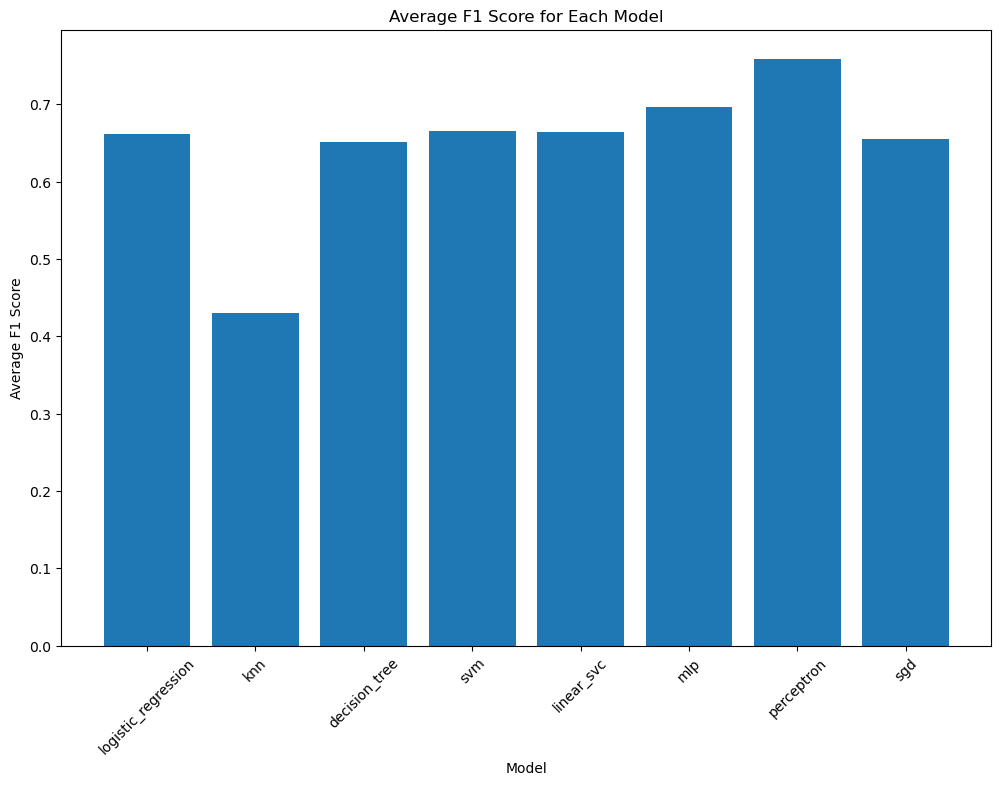

In [16]:
# Plot the average F1 scores
def plot_average_f1_scores(average_f1_scores, model_names):
    x = np.arange(len(model_names))
    plt.figure(figsize=(12, 8))
    plt.bar(x, average_f1_scores, tick_label=model_names)
    plt.xlabel('Model')
    plt.ylabel('Average F1 Score')
    plt.title('Average F1 Score for Each Model')
    plt.xticks(rotation=45)
    plt.show()

plot_average_f1_scores(average_f1_scores, model_names)

In [17]:
print("The Perceptron with a average_f1 of 0.758 is the best model:")
dataframes_dict["perceptron"]

The Perceptron with a average_f1 of 0.758 is the best model:


,Real Value,Predicted Value
716,m,m
651,m,m
371,f,m
77,f,m
212,f,f
...,...,...
332,m,m
90,m,m
356,m,f
652,m,m


# So our best model is : Perceptron with a average_f1 of 0.758

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)